# Healthcare Expenditure Analysis

## Importing all necessary libraries

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
import numpy as np

## Reading the data into dataframe

In [23]:
# Specify the Excel file path
excel_file_path = "Residence_all_tables.xlsx"


sheet_names = ['Table 1 Personal Health Care', 'Table 2 Hospital', 'Table 3 Physician and Clinics', 'Table 4 Other Professionals','Table 5 Dental','Table 6 Home Health','Table 7 Nursing','Table 8 Drugs and Non-durables','Table 9 Durables','Table 10 Other Health','Table 21 Population','Table 22 Medicare', 'Table 25 Medicaid']
# Read all sheets into a dictionary of DataFrames
sheets_dict = pd.read_excel(excel_file_path,header = 1, sheet_name=sheet_names,index_col = 0)

# Access each sheet using the sheet name as the key
for sheet_name, sheet_data in sheets_dict.items():
    print(f"Data from sheet: {sheet_name}")
    print(sheet_data.head())

Data from sheet: Table 1 Personal Health Care
                               1991      1992      1993      1994      1995  \
Region/state of residence                                                     
United States              672711.0  728437.0  775720.0  817952.0  866811.0   
New England                 40981.0   43705.0   46452.0   48478.0   52029.0   
Connecticut                 10915.0   11603.0   12048.0   12695.0   13588.0   
Maine                        3139.0    3314.0    3551.0    3699.0    4024.0   
Massachusetts               19939.0   21199.0   22840.0   23740.0   25201.0   

                               1996      1997       1998       1999  \
Region/state of residence                                             
United States              915029.0  966064.0  1019653.0  1079208.0   
New England                 54760.0   58092.0    62148.0    65048.0   
Connecticut                 14109.0   14933.0    15865.0    16690.0   
Maine                        4382.0    4739.0

## Displaying Personal Health Care table

In [24]:
sheet_name = 'Table 1 Personal Health Care'
df = sheets_dict[sheet_name]

print(f"Data from sheet: {sheet_name}")
df.head()

Data from sheet: Table 1 Personal Health Care


,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Average\nAnnual %\nGrowth\n(1991-2020)
Region/state of residence,,,,,,,,,,,,,,,,,,,,,
United States,672711.0,728437.0,775720.0,817952.0,866811.0,915029.0,966064.0,1019653.0,1079208.0,1157014.0,...,2346962.0,2405667.0,2527325.0,2674089.0,2795322.0,2905160.0,3021796.0,3175230.0,3357832.0,0.057
New England,40981.0,43705.0,46452.0,48478.0,52029.0,54760.0,58092.0,62148.0,65048.0,69388.0,...,138405.0,141505.0,146939.0,154957.0,161532.0,166153.0,172783.0,180021.0,188974.0,0.054
Connecticut,10915.0,11603.0,12048.0,12695.0,13588.0,14109.0,14933.0,15865.0,16690.0,17626.0,...,33181.0,33944.0,35350.0,36941.0,38322.0,39289.0,40671.0,42190.0,44425.0,0.050
Maine,3139.0,3314.0,3551.0,3699.0,4024.0,4382.0,4739.0,5127.0,5566.0,5924.0,...,11625.0,11709.0,12134.0,12747.0,13347.0,13891.0,14674.0,15461.0,16306.0,0.058
Massachusetts,19939.0,21199.0,22840.0,23740.0,25201.0,26498.0,28014.0,29997.0,30810.0,32893.0,...,66322.0,67722.0,70311.0,74842.0,78446.0,80621.0,84112.0,87764.0,91817.0,0.054


## Data Description

In [25]:
df.describe()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Average\nAnnual %\nGrowth\n(1991-2020)
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,6.000000e+01,6.000000e+01,6.000000e+01,...,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,60.000000
mean,33635.550000,36421.866667,38786.000000,40897.550000,43340.550000,45751.483333,48303.250000,5.098267e+04,5.396042e+04,5.785065e+04,...,1.173481e+05,1.202834e+05,1.263663e+05,1.337044e+05,1.397661e+05,1.452580e+05,1.510898e+05,1.587615e+05,1.678916e+05,0.058600
std,90104.677732,97585.425836,103913.735395,109544.854228,116034.146313,122457.010520,129254.942939,1.363613e+05,1.443169e+05,1.546892e+05,...,3.136551e+05,3.215341e+05,3.378235e+05,3.575224e+05,3.737755e+05,3.885500e+05,4.042012e+05,4.248212e+05,4.493407e+05,0.006209
min,1018.000000,1062.000000,1166.000000,1265.000000,1376.000000,1471.000000,1561.000000,1.681000e+03,1.773000e+03,1.959000e+03,...,4.469000e+03,4.571000e+03,4.822000e+03,5.074000e+03,5.253000e+03,5.508000e+03,5.667000e+03,5.866000e+03,6.399000e+03,0.046000
25%,3490.500000,3795.250000,4106.750000,4375.500000,4701.000000,5125.750000,5538.500000,5.875500e+03,6.107000e+03,6.833750e+03,...,1.534325e+04,1.577250e+04,1.667975e+04,1.773550e+04,1.867675e+04,1.943175e+04,1.992575e+04,2.088350e+04,2.218525e+04,0.054000
50%,11056.500000,11916.000000,12580.000000,13302.500000,14071.000000,14723.000000,15633.500000,1.615550e+04,1.702600e+04,1.780400e+04,...,3.707800e+04,3.812300e+04,4.033500e+04,4.281600e+04,4.526050e+04,4.751350e+04,4.963250e+04,5.196650e+04,5.403450e+04,0.058000
75%,26009.250000,27714.500000,29385.500000,31043.500000,33134.250000,35223.250000,36753.750000,3.774300e+04,3.948725e+04,4.218550e+04,...,7.894350e+04,8.045025e+04,8.428650e+04,8.852375e+04,9.278350e+04,9.634425e+04,1.003512e+05,1.054490e+05,1.105922e+05,0.063000
max,672711.000000,728437.000000,775720.000000,817952.000000,866811.000000,915029.000000,966064.000000,1.019653e+06,1.079208e+06,1.157014e+06,...,2.346962e+06,2.405667e+06,2.527325e+06,2.674089e+06,2.795322e+06,2.905160e+06,3.021796e+06,3.175230e+06,3.357832e+06,0.077000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, United States to SOURCE: Centers for Medicare and Medicaid Services, Office of the Actuary, National Health Statistics Group.
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   1991                                 60 non-null     float64
 1   1992                                 60 non-null     float64
 2   1993                                 60 non-null     float64
 3   1994                                 60 non-null     float64
 4   1995                                 60 non-null     float64
 5   1996                                 60 non-null     float64
 6   1997                                 60 non-null     float64
 7   1998                                 60 non-null     float64
 8   1999                                 60 non-null     float64
 9   2000                                 60 non-null     

## Integrate the data

In [38]:
# Initialize an empty DataFrame
merged_data = pd.DataFrame()

sheet_names_to_merge = ['Table 1 Personal Health Care', 'Table 2 Hospital', 'Table 3 Physician and Clinics',
                        'Table 4 Other Professionals', 'Table 5 Dental', 'Table 6 Home Health', 'Table 7 Nursing',
                        'Table 8 Drugs and Non-durables', 'Table 9 Durables', 'Table 10 Other Health',
                        'Table 22 Medicare', 'Table 25 Medicaid']
# Loop through each sheet in the Excel file
for sheet_name, sheet_data in sheets_dict.items():
    
    if sheet_name == 'Table 21 Population':
        continue
    
    # Add the values of the current sheet to the merged_data DataFrame
    if merged_data.empty:
        merged_data = sheet_data
    else:
        merged_data = merged_data.add(sheet_data, fill_value=0)

# Display the merged data
merged_data


,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Average\nAnnual %\nGrowth\n(1991-2020)
Region/state of residence,,,,,,,,,,,,,,,,,,,,,
United States,1551466.0,1692482.0,1813872.0,1925863.0,2049300.0,2167585.0,2286841.0,2399186.0,2535733.0,2717304.0,...,5615822.0,5770567.0,6081046.0,6438934.0,6722901.0,6985386.0,7271932.0,7648338.0,8057100.0,0.731
New England,95427.0,102538.0,109289.0,115368.0,124539.0,130846.0,139051.0,147603.0,154296.0,164259.0,...,329907.0,337707.0,352479.0,371661.0,387136.0,397590.0,413859.0,430264.0,449036.0,0.679
Connecticut,25198.0,26854.0,28112.0,29938.0,32298.0,33597.0,35612.0,37440.0,39285.0,41492.0,...,79652.0,81457.0,85157.0,88902.0,92059.0,94528.0,98056.0,101483.0,106113.0,0.620
Maine,7294.0,7812.0,8458.0,8881.0,9632.0,10496.0,11360.0,12279.0,13201.0,14047.0,...,28059.0,28543.0,29407.0,30806.0,32176.0,33582.0,35406.0,37442.0,39309.0,0.713
Massachusetts,46813.0,50115.0,53895.0,56814.0,60805.0,63666.0,67346.0,71530.0,73657.0,78366.0,...,158172.0,161470.0,168739.0,179672.0,188192.0,192466.0,201145.0,209299.0,217765.0,0.685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Nevada,6864.0,7777.0,8379.0,9183.0,9993.0,10832.0,11835.0,12880.0,13861.0,15531.0,...,39067.0,40758.0,44936.0,48014.0,51540.0,54437.0,57484.0,60680.0,62909.0,1.022
Oregon,15326.0,16982.0,18199.0,19357.0,20962.0,22168.0,23581.0,26038.0,27870.0,29814.0,...,65731.0,68672.0,76056.0,82049.0,86011.0,88630.0,93128.0,98714.0,103486.0,0.837
Washington,28767.0,31651.0,33353.0,35317.0,38101.0,39834.0,41814.0,45329.0,49140.0,52835.0,...,117561.0,119551.0,126617.0,134000.0,140437.0,146043.0,153475.0,162293.0,169230.0,0.770


## Validation of Integration

In [42]:
sum_first_column_data = pd.DataFrame()
# Loop through each sheet in the dictionary
for sheet_name in sheet_names_to_merge:
    # Skip 'Table 21 Population' sheet
    if sheet_name == 'Table 21 Population':
        continue
    
    # Extract the first column and add it to the sum_first_column_data DataFrame
    first_column_data = sheets_dict[sheet_name].iloc[:, 0]
    
    if sum_first_column_data.empty:
        sum_first_column_data = first_column_data
    else:
        sum_first_column_data = sum_first_column_data.add(first_column_data, fill_value=0)
        
        
print("**Sum of First Column from all the Sheets** \n",sum_first_column_data)
print("**First Column from merged dataframe**", merged_data.iloc[:,0])

**Sum of First Column from all the Sheets** 
 Region/state of residence
United States                                                                                                          1551466.0
New England                                                                                                              95427.0
Connecticut                                                                                                              25198.0
Maine                                                                                                                     7294.0
Massachusetts                                                                                                            46813.0
                                                                                                                         ...    
Nevada                                                                                                                    6864.0
Oregon                   

## Data Transformation

In [43]:
def transform_table(input_df):
    input_df = input_df.iloc[:,:-1]
    rows_to_keep = ["New England","Mideast","Great Lakes","Plains","Southeast","Southwest","Rocky Mountains","Far West"]
    mask = input_df.index.isin(rows_to_keep)
    df_filtered = input_df[mask]
    df_filtered = df_filtered.T
    df_filtered.columns.name = None
    df_filtered.index = pd.to_datetime(df_filtered.index, format='%Y')

    common_index = df_filtered.index
    for col in df_filtered.columns:
        variable_name = f"df_{col.replace(' ', '_')}"
        globals()[variable_name] = df_filtered[[col]].copy()
        globals()[variable_name].index = common_index
    

    
    #df_filtered.head()
    return df_filtered



In [44]:
transform_table(merged_data)

,New England,Mideast,Great Lakes,Plains,Southeast,Southwest,Rocky Mountains,Far West
1991-01-01,95427.0,320053.0,257818.0,104720.0,352434.0,138397.0,38121.0,244496.0
1992-01-01,102538.0,347939.0,280652.0,113425.0,387533.0,152573.0,41631.0,266185.0
1993-01-01,109289.0,372038.0,300135.0,120749.0,419477.0,164723.0,44855.0,282604.0
1994-01-01,115368.0,395008.0,317299.0,130164.0,449545.0,175924.0,47799.0,294754.0
1995-01-01,124539.0,417611.0,336755.0,138455.0,481868.0,189710.0,51803.0,308562.0
1996-01-01,130846.0,437319.0,355719.0,147105.0,513658.0,204136.0,55502.0,323297.0
1997-01-01,139051.0,457548.0,372766.0,155416.0,548046.0,218138.0,59404.0,336475.0
1998-01-01,147603.0,478035.0,385784.0,166110.0,569691.0,228521.0,63614.0,359824.0
1999-01-01,154296.0,506877.0,406455.0,175643.0,602494.0,243178.0,67495.0,379295.0
2000-01-01,164259.0,538241.0,435916.0,190263.0,653337.0,259335.0,74531.0,401431.0


## Time Series Analysis

## 1. New England Time Series

In [45]:
df_New_England

,New England
1991-01-01,95427.0
1992-01-01,102538.0
1993-01-01,109289.0
1994-01-01,115368.0
1995-01-01,124539.0
1996-01-01,130846.0
1997-01-01,139051.0
1998-01-01,147603.0
1999-01-01,154296.0
2000-01-01,164259.0


Text(0, 0.5, 'Expenditure (Millions of Dollars)')

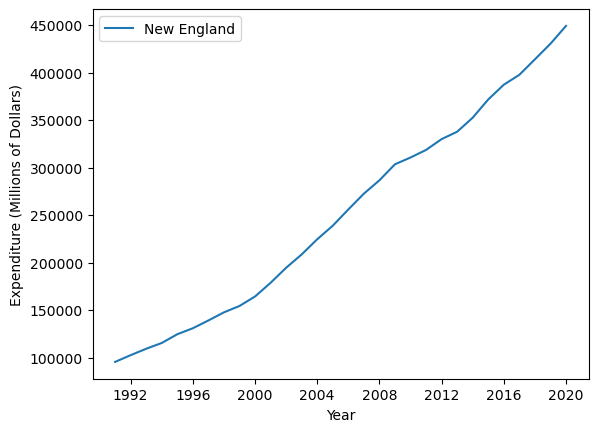

In [52]:
sns.lineplot(df_New_England)
plt.xlabel("Year")
plt.ylabel("Expenditure (Millions of Dollars)")

## ACF and PACF

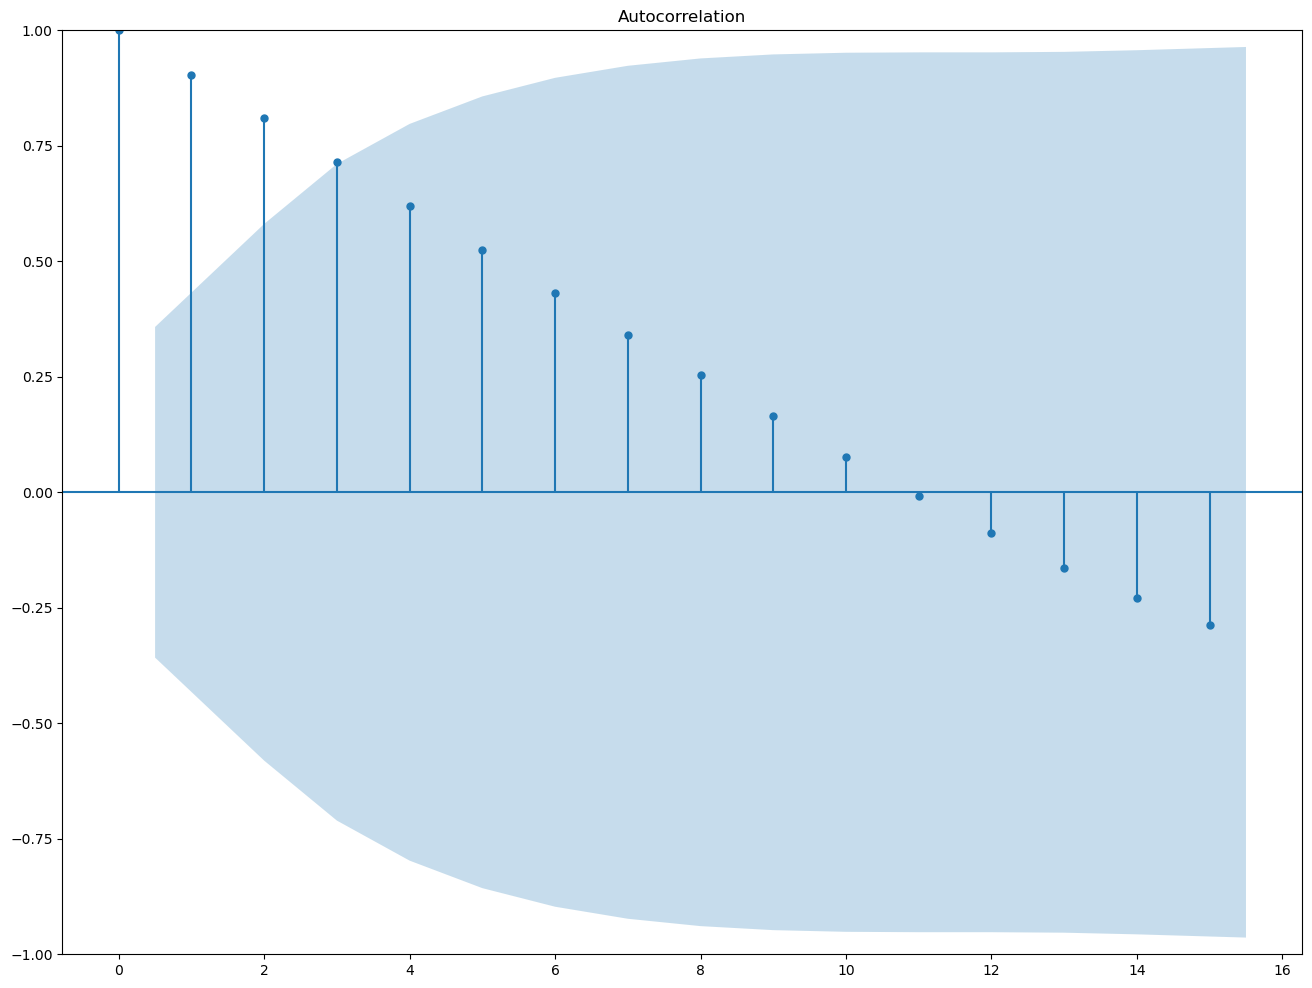

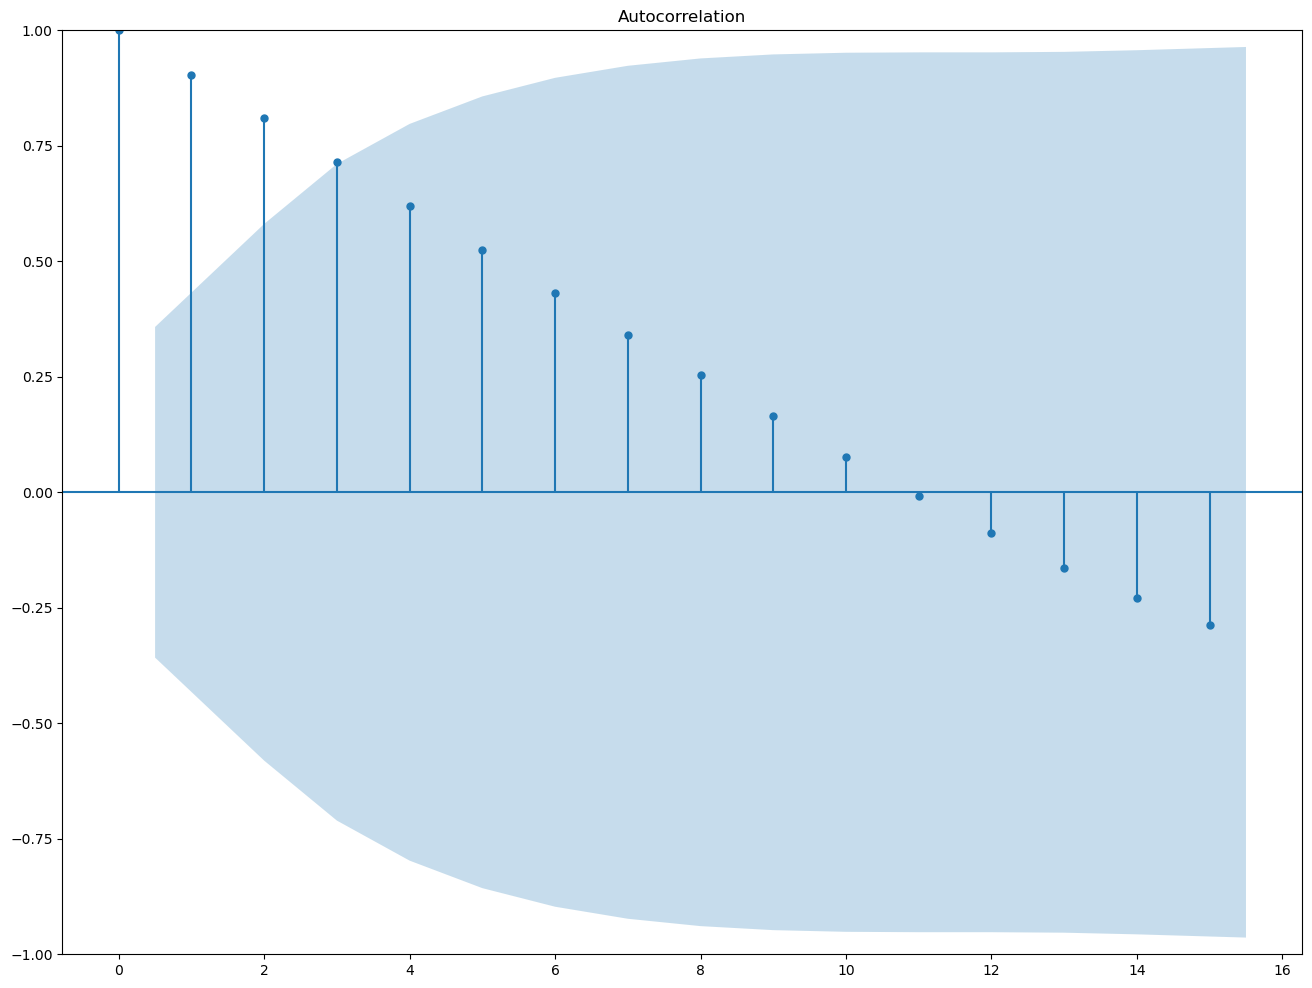

In [66]:
plot_acf(df_New_England['New England'])

C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


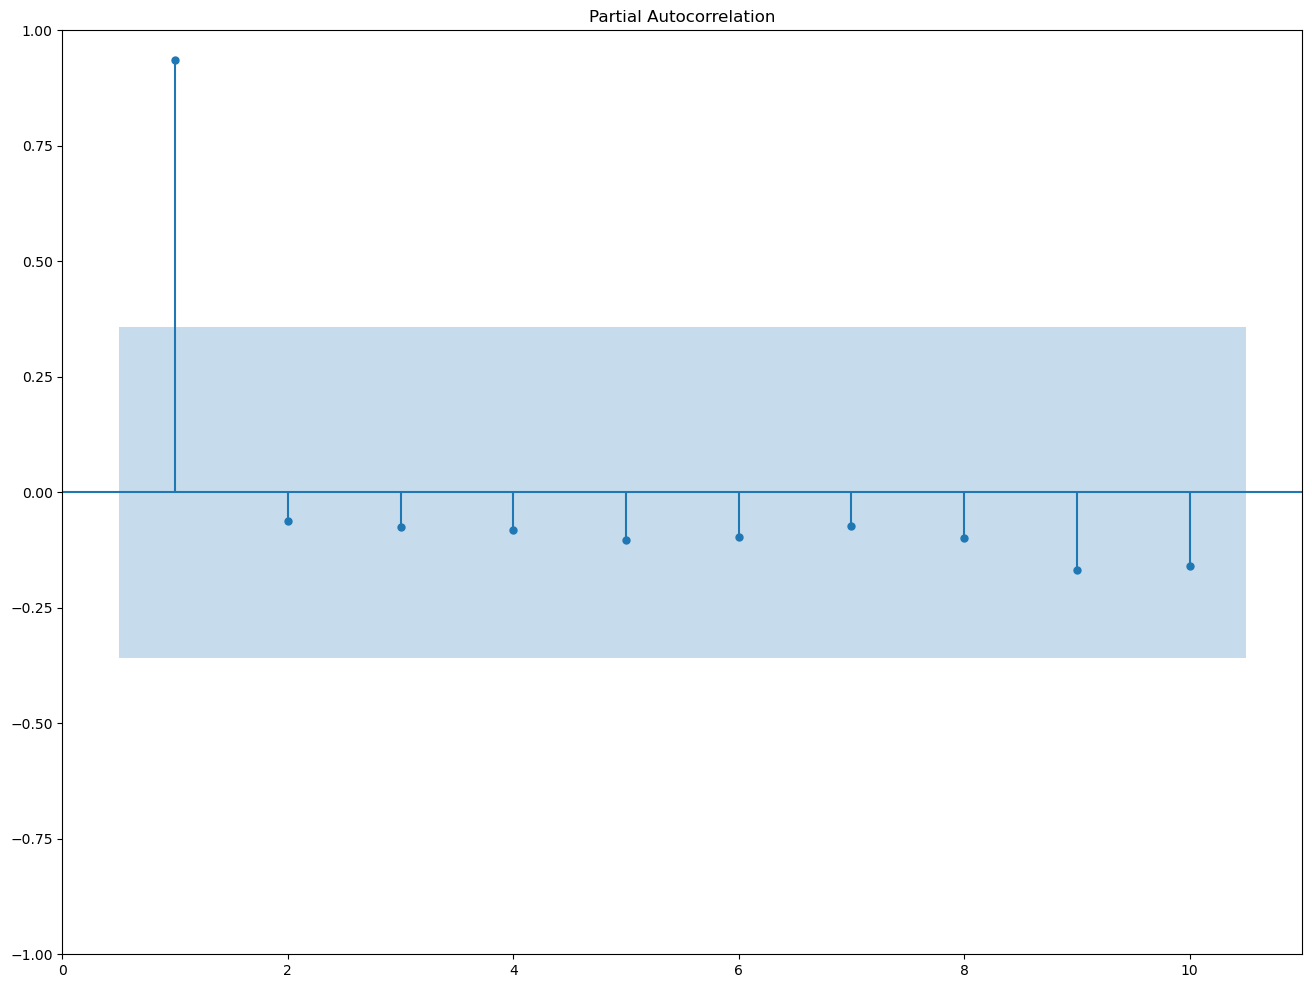

In [74]:
plot_pacf(df_New_England['New England'], lags=10, zero=False)
plt.show()

## Trend Analysis

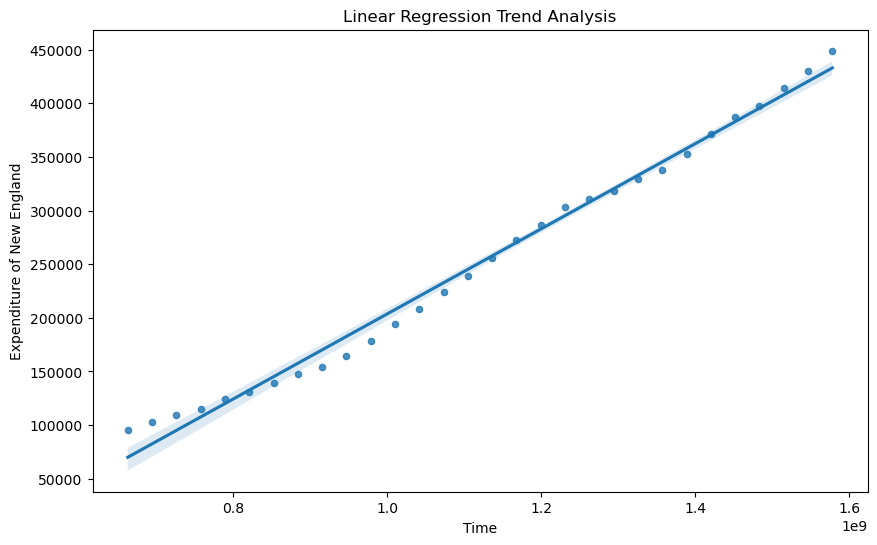

In [68]:
#sns.regplot(x=df_ny.index, y='New York', data=df_ny)
x = df_New_England.index.astype('int64') // 10**9 
y = df_New_England["New England"]
plt.figure(figsize=(10, 6))
sns.regplot(x=x, y=y,data = df_New_England,scatter_kws={'s':20})

# set the title and axis labels
plt.title('Linear Regression Trend Analysis')
plt.xlabel('Time')
plt.ylabel('Expenditure of New England')

# display the plot
plt.show()

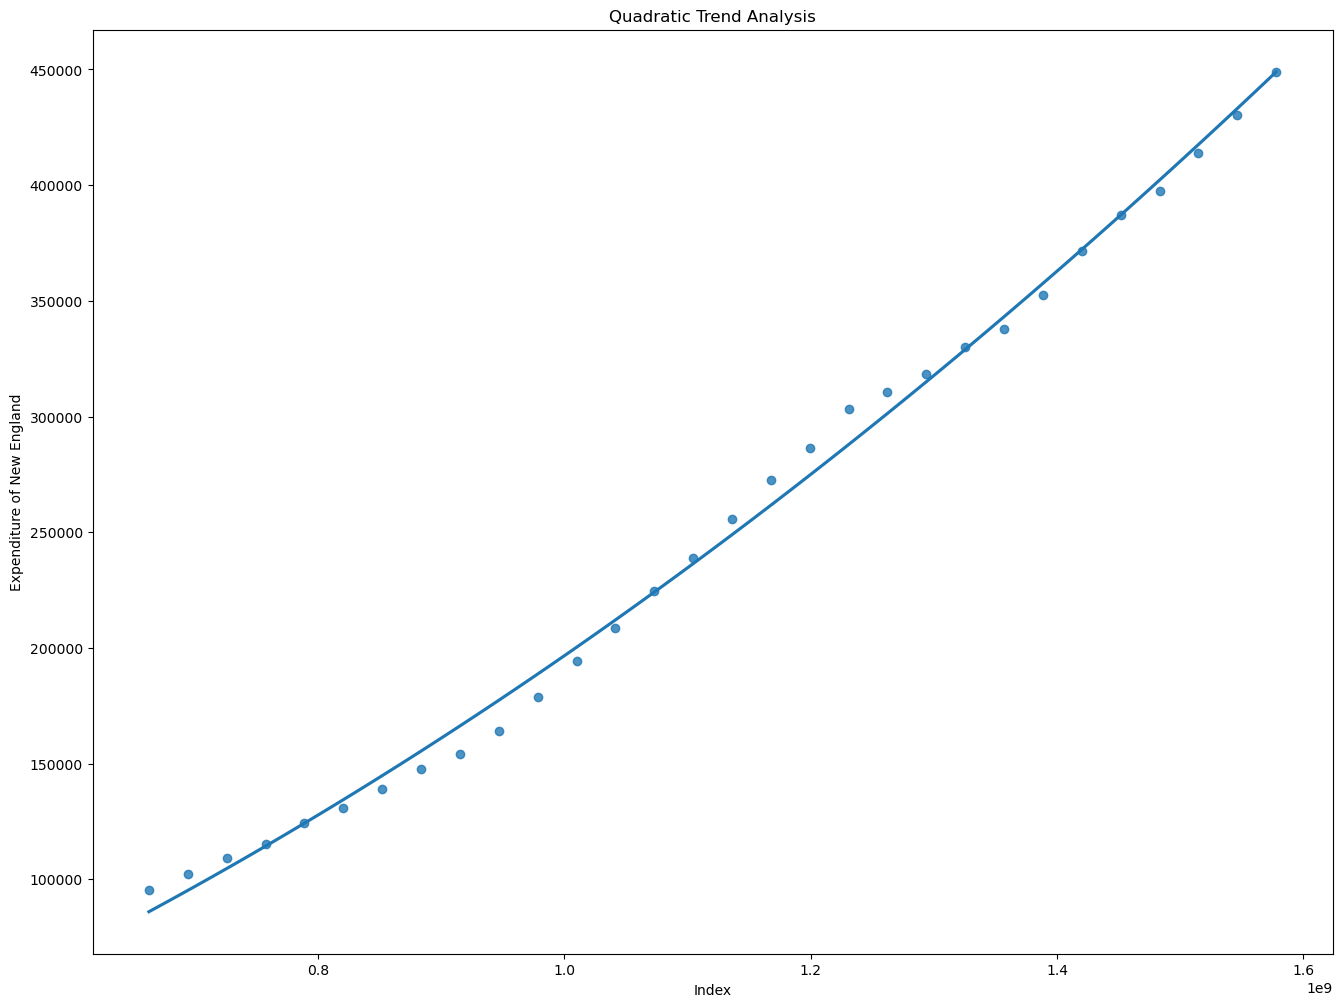

In [70]:
x = df_New_England.index.astype('int64') // 10**9  # Convert DateTime to Unix timestamp
y = df_New_England['New England']
coeffs = np.polyfit(x,y, 2)
quadratic_fit = np.polyval(coeffs, x)


# create the plot
sns.regplot(x=x, y=y, data=df_New_England, order=2, ci=None)

# set the title and axis labels
plt.title('Quadratic Trend Analysis')
plt.xlabel('Index')
plt.ylabel('Expenditure of New England')

# display the plot
plt.show()

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

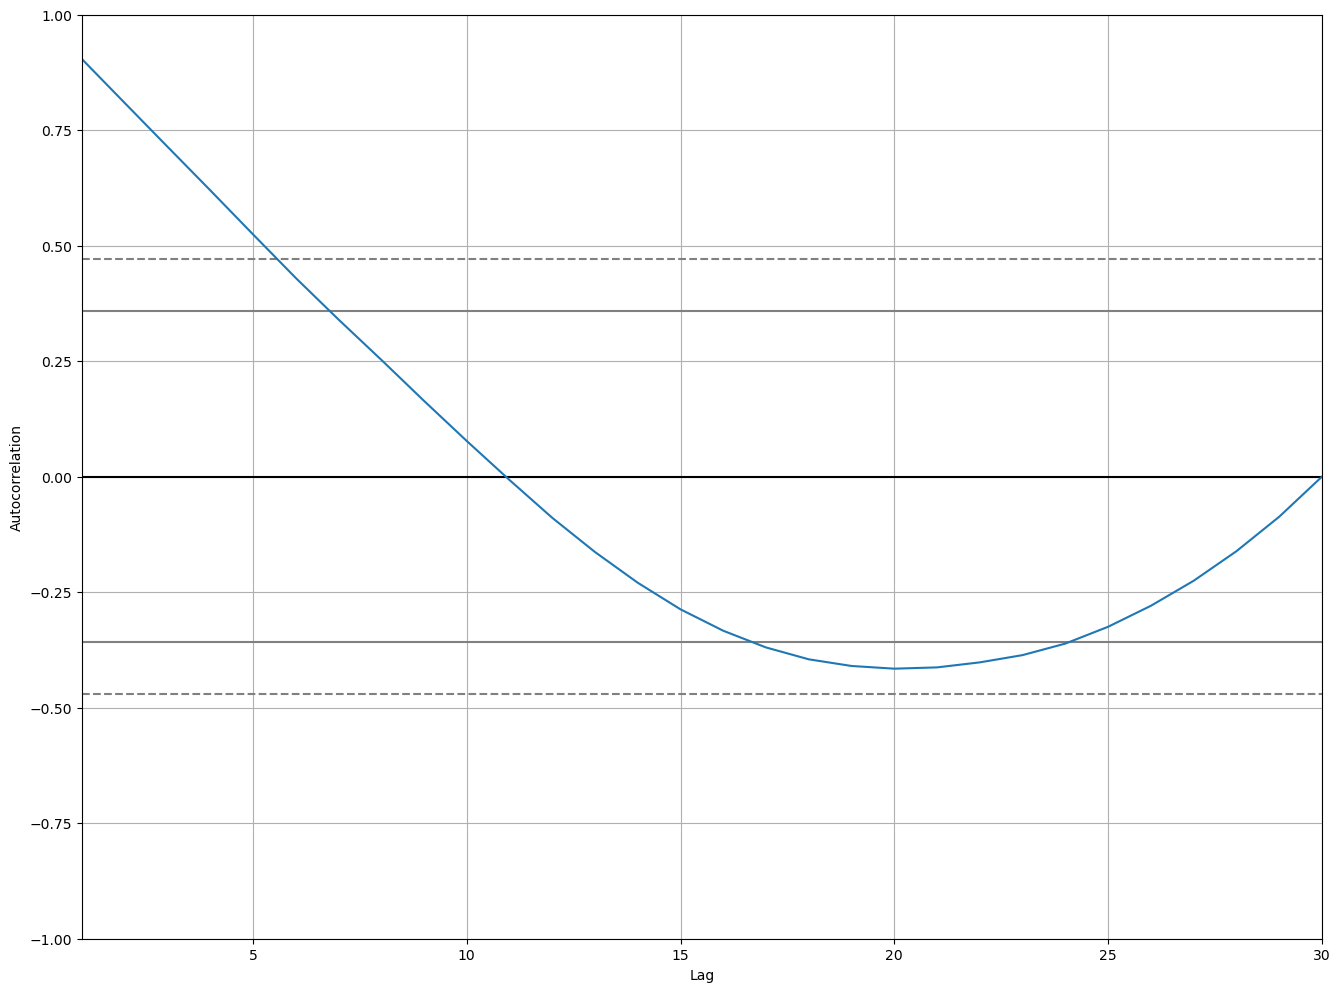

In [75]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_New_England)

## ARIMA Model

C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Shravan\anaconda3\envs\myVAenv\lib\site-packages\s

                               SARIMAX Results                                
Dep. Variable:            New England   No. Observations:                   30
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -284.793
Date:                Sun, 04 Feb 2024   AIC                            575.586
Time:                        20:07:03   BIC                            579.688
Sample:                    01-01-1991   HQIC                           576.871
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.001    701.719      0.000       0.997       1.003
ma.L1         -0.9992      0.269     -3.721      0.000      -1.525      -0.473
sigma2      1.357e+07   1.35e-08   1.01e+15      0.0

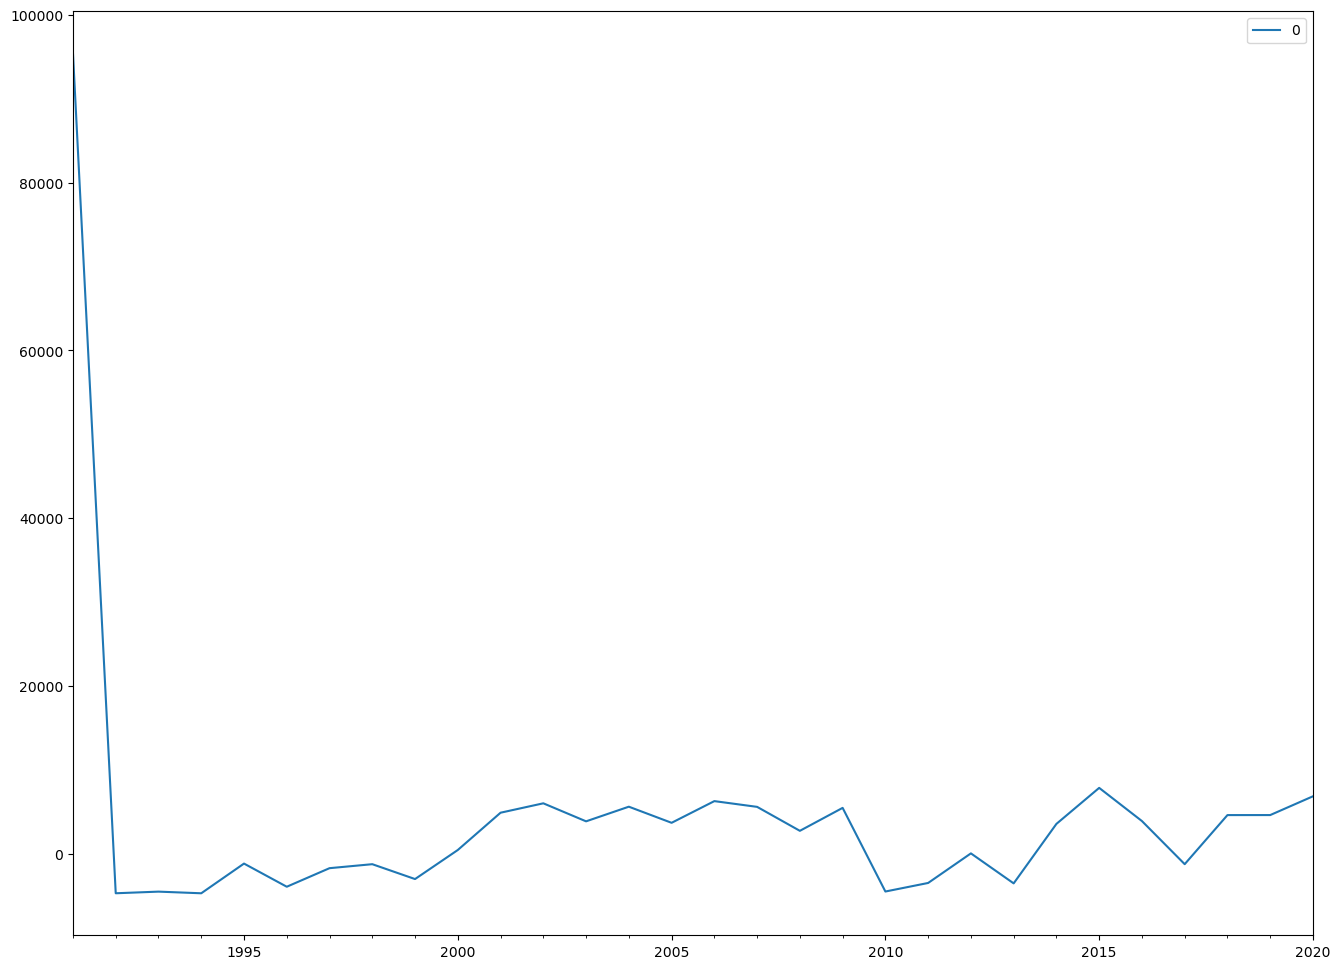

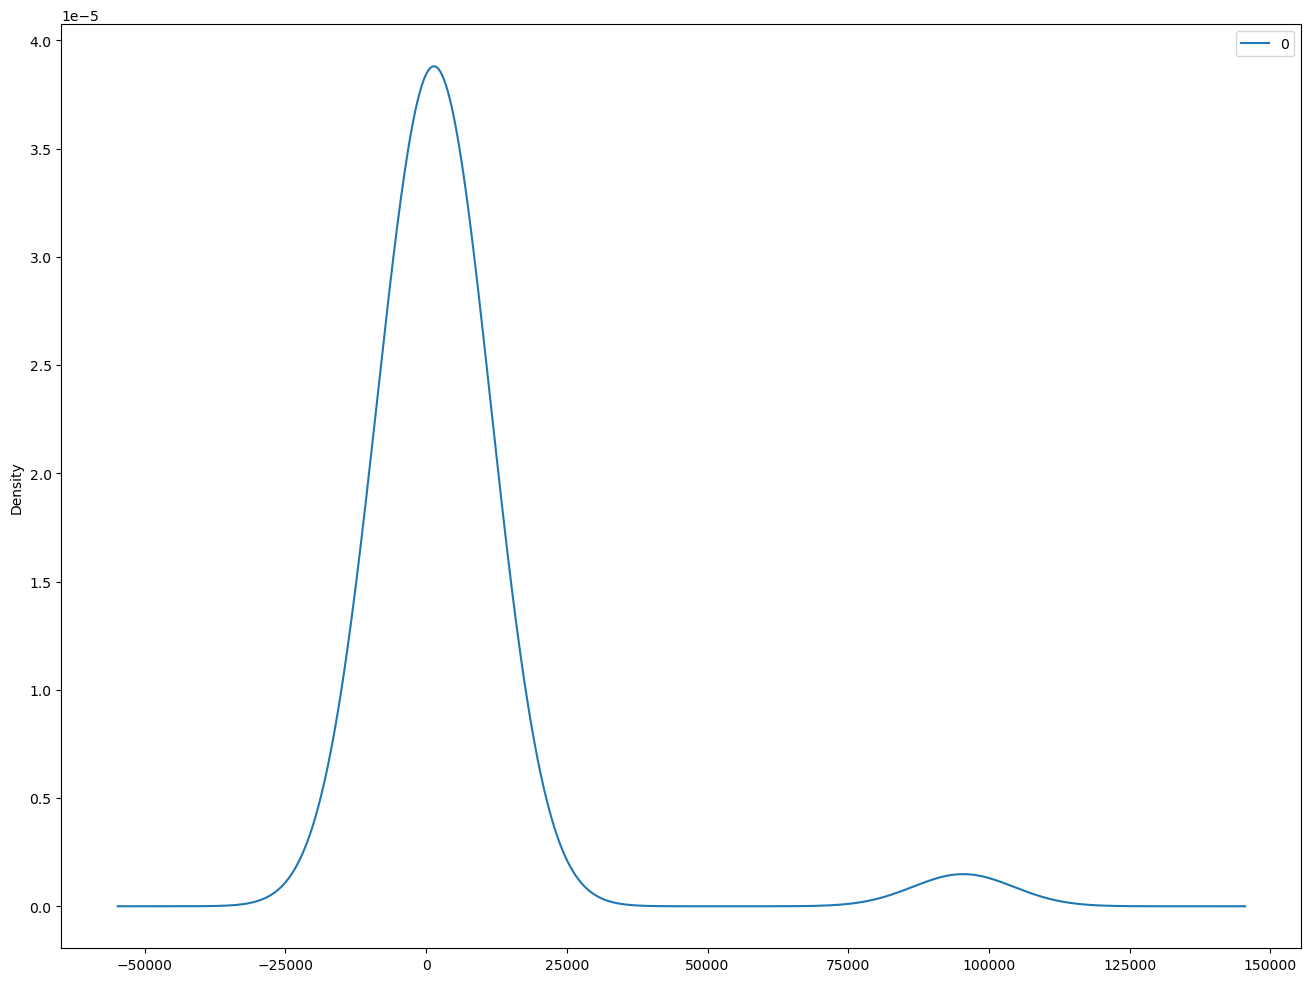

                  0
count     30.000000
mean    4446.731642
std    17676.628413
min    -4721.208759
25%    -2701.738333
50%     3138.057757
75%     5316.502590
max    95427.000000


In [86]:
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame
from matplotlib import pyplot

model = ARIMA(df_New_England, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())